# GridWorld Value Iteration Implementation

- Agent starts at top-left corner (state 0)
- Goal is to reach bottom-right corner (state 15)
- Actions: up, down, left, right (equal probability)
- Rewards: -1 for each move, 0 for terminal state
- No obstacles
- Discount factor (γ) = 1
- Convergence threshold = 1e-4

In [2]:
%pip install numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def value_iteration_grid_world():
    # Grid parameters
    N = 4  # 4x4 grid
    states = N * N
    actions = ['up', 'down', 'left', 'right']
    gamma = 1.0  # discount factor
    theta = 1e-4  # convergence threshold
    
    # Initialize value function
    V = np.zeros((N, N))
    
    # Set rewards: -1 for all states except terminal state (bottom-right)
    R = -np.ones((N, N))
    R[N-1, N-1] = 0  # terminal state reward
    
    def get_next_state(i, j, action):
        """Return next state (i, j) given current state and action"""
        if action == 'up':
            return max(i-1, 0), j
        elif action == 'down':
            return min(i+1, N-1), j
        elif action == 'left':
            return i, max(j-1, 0)
        else:  # right
            return i, min(j+1, N-1)
    
    iteration = 0
    history = [V.copy()]  # Track value function history
    
    while True:
        delta = 0  # track maximum change
        V_new = np.copy(V)
        
        # Update each state
        for i in range(N):
            for j in range(N):
                # Skip terminal state
                if i == N-1 and j == N-1:
                    continue
                
                # Sum over all actions (since they're equally probable)
                V_new[i, j] = sum(0.25 * (R[i, j] + gamma * V[next_i, next_j])
                                 for action in actions
                                 for next_i, next_j in [get_next_state(i, j, action)])
                
                delta = max(delta, abs(V_new[i, j] - V[i, j]))
        
        # Update value function
        V = V_new.copy()
        history.append(V.copy())
        iteration += 1
        
        # Check for convergence
        if delta < theta:
            break
    
    return V, iteration, history

# Run the algorithm
final_values, num_iterations, history = value_iteration_grid_world()
print(f"\nConverged after {num_iterations} iterations")
print("\nFinal Value Function:")
print(final_values)


Converged after 471 iterations

Final Value Function:
[[-59.42367735 -57.42387125 -54.2813141  -51.71012579]
 [-57.42387125 -54.56699476 -49.71029394 -45.13926711]
 [-54.2813141  -49.71029394 -40.85391609 -29.99766609]
 [-51.71012579 -45.13926711 -29.99766609   0.        ]]


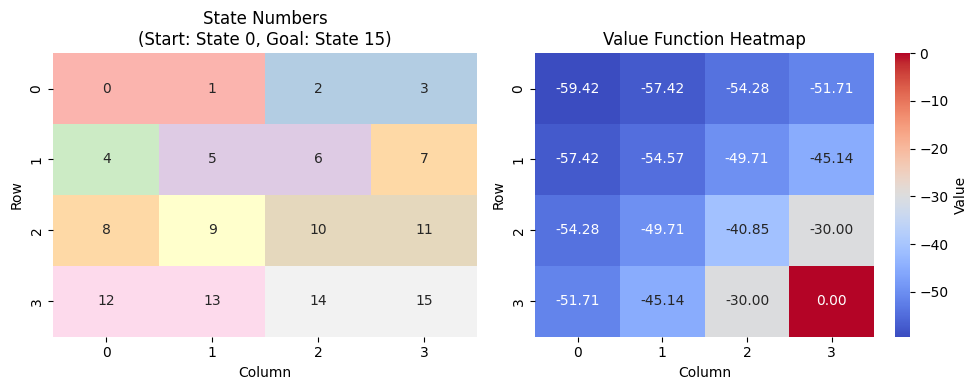


Path interpretation:
- State 0 (top-left) is the starting state
- State 15 (bottom-right) is the goal state
- Darker blue indicates higher values (closer to goal)
- Darker red indicates lower values (further from goal)
- The optimal path follows increasing values towards the goal


In [ ]:
# First create a grid showing state numbers
state_numbers = np.arange(16).reshape(4, 4)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(state_numbers, annot=True, fmt='d', cmap='Pastel1',
            cbar=False)
plt.title('State Numbers\n(Start: State 0, Goal: State 15)')
plt.xlabel('Column')
plt.ylabel('Row')

# Then show the value function heatmap
plt.subplot(1, 2, 2)
sns.heatmap(final_values, annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'label': 'Value'})
plt.title('Value Function Heatmap')
plt.xlabel('Column')
plt.ylabel('Row')
plt.tight_layout()
plt.show()

print("\nPath interpretation:")
print("- State 0 (top-left) is the starting state")
print("- State 15 (bottom-right) is the goal state")
print("- Darker blue indicates lower values (more negative, further from goal)")
print("- Darker red indicates higher values (closer to 0, closer to goal)")
print("- The optimal path follows increasing values (blue to red) towards the goal")